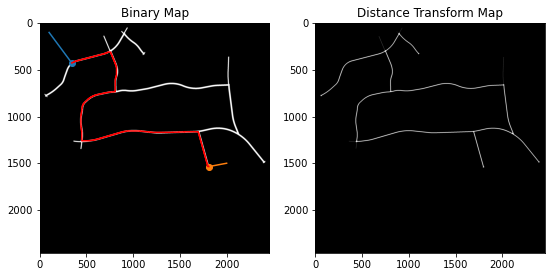

In [58]:
from PIL import Image
from scipy.spatial import cKDTree
from a_star_planner import AStar
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pyastar2d

OBSTACLE  = 0
FREESPACE = 255

if __name__ == '__main__':
    # 读取灰度图
    pillow_img = Image.open('./data/road_network.tga')
    gray_image = np.array(pillow_img.convert('L'))

    # 图片二值化处理
    _, binary_map = cv2.threshold(gray_image, 
                                  0.5 * FREESPACE, 
                                  FREESPACE, 
                                  cv2.THRESH_BINARY)

    # 距离变换提取道路中心
    dist_transform = cv2.distanceTransform(binary_map, cv2.DIST_L2, 3)
    normalized_dist_transform = cv2.normalize(dist_transform, None, 0, 1.0, cv2.NORM_MINMAX)
    _, binary_dist_transform = cv2.threshold(normalized_dist_transform, 0.4, 1, cv2.THRESH_BINARY)
    
    weight_map = dist_transform + 1e-3
    weight_map = (1/weight_map) + 1
    weight_map = weight_map.astype(np.float32)
    
    # 提取可行路径点的坐标，构建 kd 树
    feasible_point = np.argwhere(binary_dist_transform == 1) 
    feasible_point = feasible_point[:, [1, 0]]
    feasible_kd_tree = cKDTree(feasible_point)
       
    # 测试一下 kd 树偏移起点和终点的功能
    raw_start = np.array([100, 100])
    raw_goal  = np.array([2000, 1500])
    
    _, start_idx = feasible_kd_tree.query(raw_start)
    _, goal_idx  = feasible_kd_tree.query(raw_goal)
    
    start_x = feasible_point[start_idx, 0]
    start_y = feasible_point[start_idx, 1]
    
    goal_x = feasible_point[goal_idx, 0]
    goal_y = feasible_point[goal_idx, 1]
    
    # # 进行 A* 规划
    path = pyastar2d.astar_path(weight_map, 
                                (start_y, start_x), 
                                (goal_y , goal_x))
    
    # 显示二值化的图像
    plt.figure(figsize=(14, 7))
    plt.subplot(1, 3, 1)
    plt.imshow(binary_map, cmap='gray')
    
    plt.plot([raw_start[0], start_x], 
             [raw_start[1], start_y])
    plt.plot([raw_goal[0], goal_x], 
             [raw_goal[1], goal_y])
    plt.scatter(start_x, start_y)
    plt.scatter(goal_x, goal_y) 
    plt.title('Binary Map')
    
    # if path is not None and path != []:
    plt.plot(path[:, 1], path[:, 0], 'r-')
    
    # 显示距离变换的图像
    plt.subplot(1, 3, 2)
    plt.imshow(binary_dist_transform, cmap='gray')   
    plt.title('Distance Transform Map')
    plt.show()

In [50]:
path

array([[ 342,  426],
       [ 343,  426],
       [ 344,  426],
       ...,
       [1808, 1537],
       [1808, 1536],
       [1809, 1536]])

In [54]:
goal_x

1809